<a href="https://colab.research.google.com/github/Elwing-Chou/ximen0703/blob/main/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import cifar10
# ((nparray:x_train, nparray:y_train), (nparray:x_test, nparray:y_test))
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 13s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [2]:
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [3]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

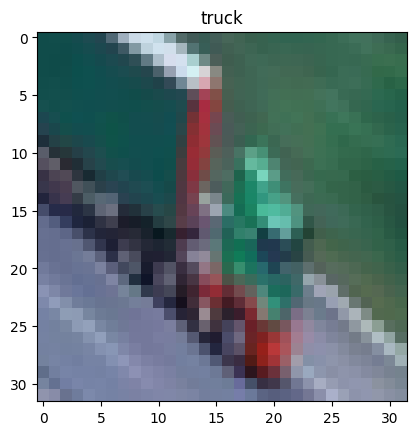

In [4]:
import matplotlib.pyplot as plt
# https://matplotlib.org/stable/tutorials/colors/colormaps.html
# reverse: _r
idx = 50
plt.title("{}".format(trans[y_train[idx]]))
plt.imshow(x_train[idx])

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
l = [
    # 1f(3 * 3 * 3) * 64 + 64 = 1792
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1f(3 * 3 * 64) * 128 + 128 = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(512, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Flatten(),
    Dense(10, activation="softmax")
]
model = Sequential(l)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 256)        0

In [7]:
from tensorflow.keras.layers import GlobalAveragePooling2D
l = [
    # 1f(3 * 3 * 3) * 64 + 64 = 1792
    Conv2D(64, 3, activation="relu", padding="same", input_shape=(32, 32, 3)),
    MaxPooling2D(),
    # 1f(3 * 3 * 64) * 128 + 128 = 73856
    Conv2D(128, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(256, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    Conv2D(512, 3, activation="relu", padding="same"),
    MaxPooling2D(),
    GlobalAveragePooling2D(),
    Dense(10, activation="softmax")
]
model = Sequential(l)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 8, 8, 256)         295168    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 256)       